In [ ]:
job.cancel()
print(job.status())

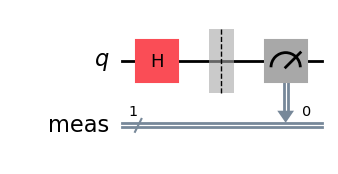

In [75]:
from qiskit.circuit.library import HGate
from qiskit import QuantumCircuit
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from PIL import Image
import math

# Simulatoren
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
from qiskit_aer import AerSimulator

# Quantencircuit erstellen
hadamard_gate = HGate()
circuit = QuantumCircuit(1)
circuit.append(hadamard_gate, [0])
circuit.measure_all()

# Quantencircuit anzeigen
circuit.draw("mpl")

In [20]:
# Füge deinen API-Token ein:
token = ""

# Speichere das Konto lokal und setze es als Standard:
QiskitRuntimeService.save_account(
    channel="ibm_cloud",         # oder "ibm_quantum_platform" bei neuer Plattform
    token=token,
    instance="Projekt Zufall 1",  # Instanzname
    overwrite=True,
    set_as_default=True
)

InvalidAccountError: "Invalid `token` value. Expected a non-empty string, got ''."

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_torino')>]
<IBMBackend('ibm_sherbrooke')>


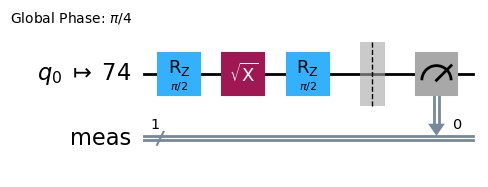

In [76]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

service = QiskitRuntimeService()  # lädt deine gespeicherten Credentials
print(service.backends())

backend_name = service.least_busy()
print(backend_name)
sampler = Sampler(mode=backend_name)

pm = generate_preset_pass_manager(backend=backend_name, optimization_level = 3)
isa_circuit = pm.run(circuit)
isa_circuit.draw("mpl")

In [72]:
# Send the run request
# job = sampler.run([isa_circuit], shots = 100000)
# print("Job-ID:", job.job_id())

In [24]:
print(job.status())

DONE


In [77]:
# (irgendeinen) Job laden, nach Job ID

aktueller_job = 'd1n1vi33rr0s73berb70' #job.job_id()
job_id = 'd1mf95n29o4s73aqu9c0'
job1 = service.job(aktueller_job) # oder aktueller_job anstatt job_id

job_status = job1.status()
print(f"Job-Status: {job_status}")
result = job1.result()

Job-Status: DONE


In [78]:
print("Ergebnisse auf echter Hardware:", result)
counts = result[0].data.meas.get_counts()
print(counts)

Ergebnisse auf echter Hardware: PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=100000, num_bits=1>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-07-09 07:52:42', stop='2025-07-09 07:53:09', size=100000>)])}, 'version': 2})
{'1': 50022, '0': 49978}


In [79]:
# Verwendbare Werte
samples = result[0].data.meas.array
print(samples)
import numpy as np
flattened_array = samples.flatten()
print(flattened_array)

[[1]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]]
[1 0 1 ... 0 0 1]


In [80]:
def csvBits(samples_int): 
    # Umwandeln in eine Liste von Listen
    memory_rows = [[bit] for bit in samples_int]
    with open("C:/Users/jojot/Documents/Quantum_Computing_Team/Quantum_Computing_Team/Projekt Zufall/Ergebnisse/ergebnisseIBMBits.csv", "w", newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(memory_rows)

In [81]:
def csvBytes(samples_int):
    bytes_list = [samples_int[i:i+8] for i in range(0, len(samples_int), 8)]
    with open("C:/Users/jojot/Documents/Quantum_Computing_Team/Quantum_Computing_Team/Projekt Zufall/Ergebnisse/ergebnisseIBMBytes.csv", "w", newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(bytes_list)

In [82]:
def csvDezimal(samples_int):
    with open('C:/Users/jojot/Documents/Quantum_Computing_Team/Quantum_Computing_Team/Projekt Zufall/Ergebnisse/ergebnisseIBMBytes.csv', 'r') as infile, open('C:/Users/jojot/Documents/Quantum_Computing_Team/Quantum_Computing_Team/Projekt Zufall/Ergebnisse/ergebnisseIBMDez.csv', 'w', newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)

    for row in reader:
        # Binärliste zu String, dann zu int
        binary_str = ''.join(row)
        dezimalwert = int(binary_str, 2)
        writer.writerow([dezimalwert])


In [4]:
import csv
csvBits(flattened_array)
csvBytes(flattened_array)
# csvDezimal(flattened_array)

NameError: name 'csvBits' is not defined

In [ ]:
print(service.least_busy())

Statistische Analyse:
                      Typ  Chi² p-Wert  Runs p-Wert  Ljung-Box p  Lempel-Ziv  Max Power  Entropie  Pattern p-Wert Seed erkennbar  Bitflip p-Wert  Wiederholungs-Lag Pseudozufall?
      Python Pseudozufall      0.22463      0.46214      0.14338     1.01850    7.35022   0.99999         0.57685             Ja         0.46316                  0            Ja
Echter Zufall (simuliert)      0.53539      0.24503      0.12689     1.01767    7.00905   1.00000         0.37174           Nein         0.24711                  0            Ja
  Kryptografischer Zufall      0.31731      0.57151      0.42018     1.12500    2.67299   0.99718         1.00000             Ja         0.61647                  0            Ja
         Mersenne Twister      0.02435      0.21152      0.19922     1.01551    5.19390   0.99996         0.94552           Nein         0.21747                  0            Ja
                 Hadamard      0.88934      0.10544      0.57840     1.02033    6.08485 

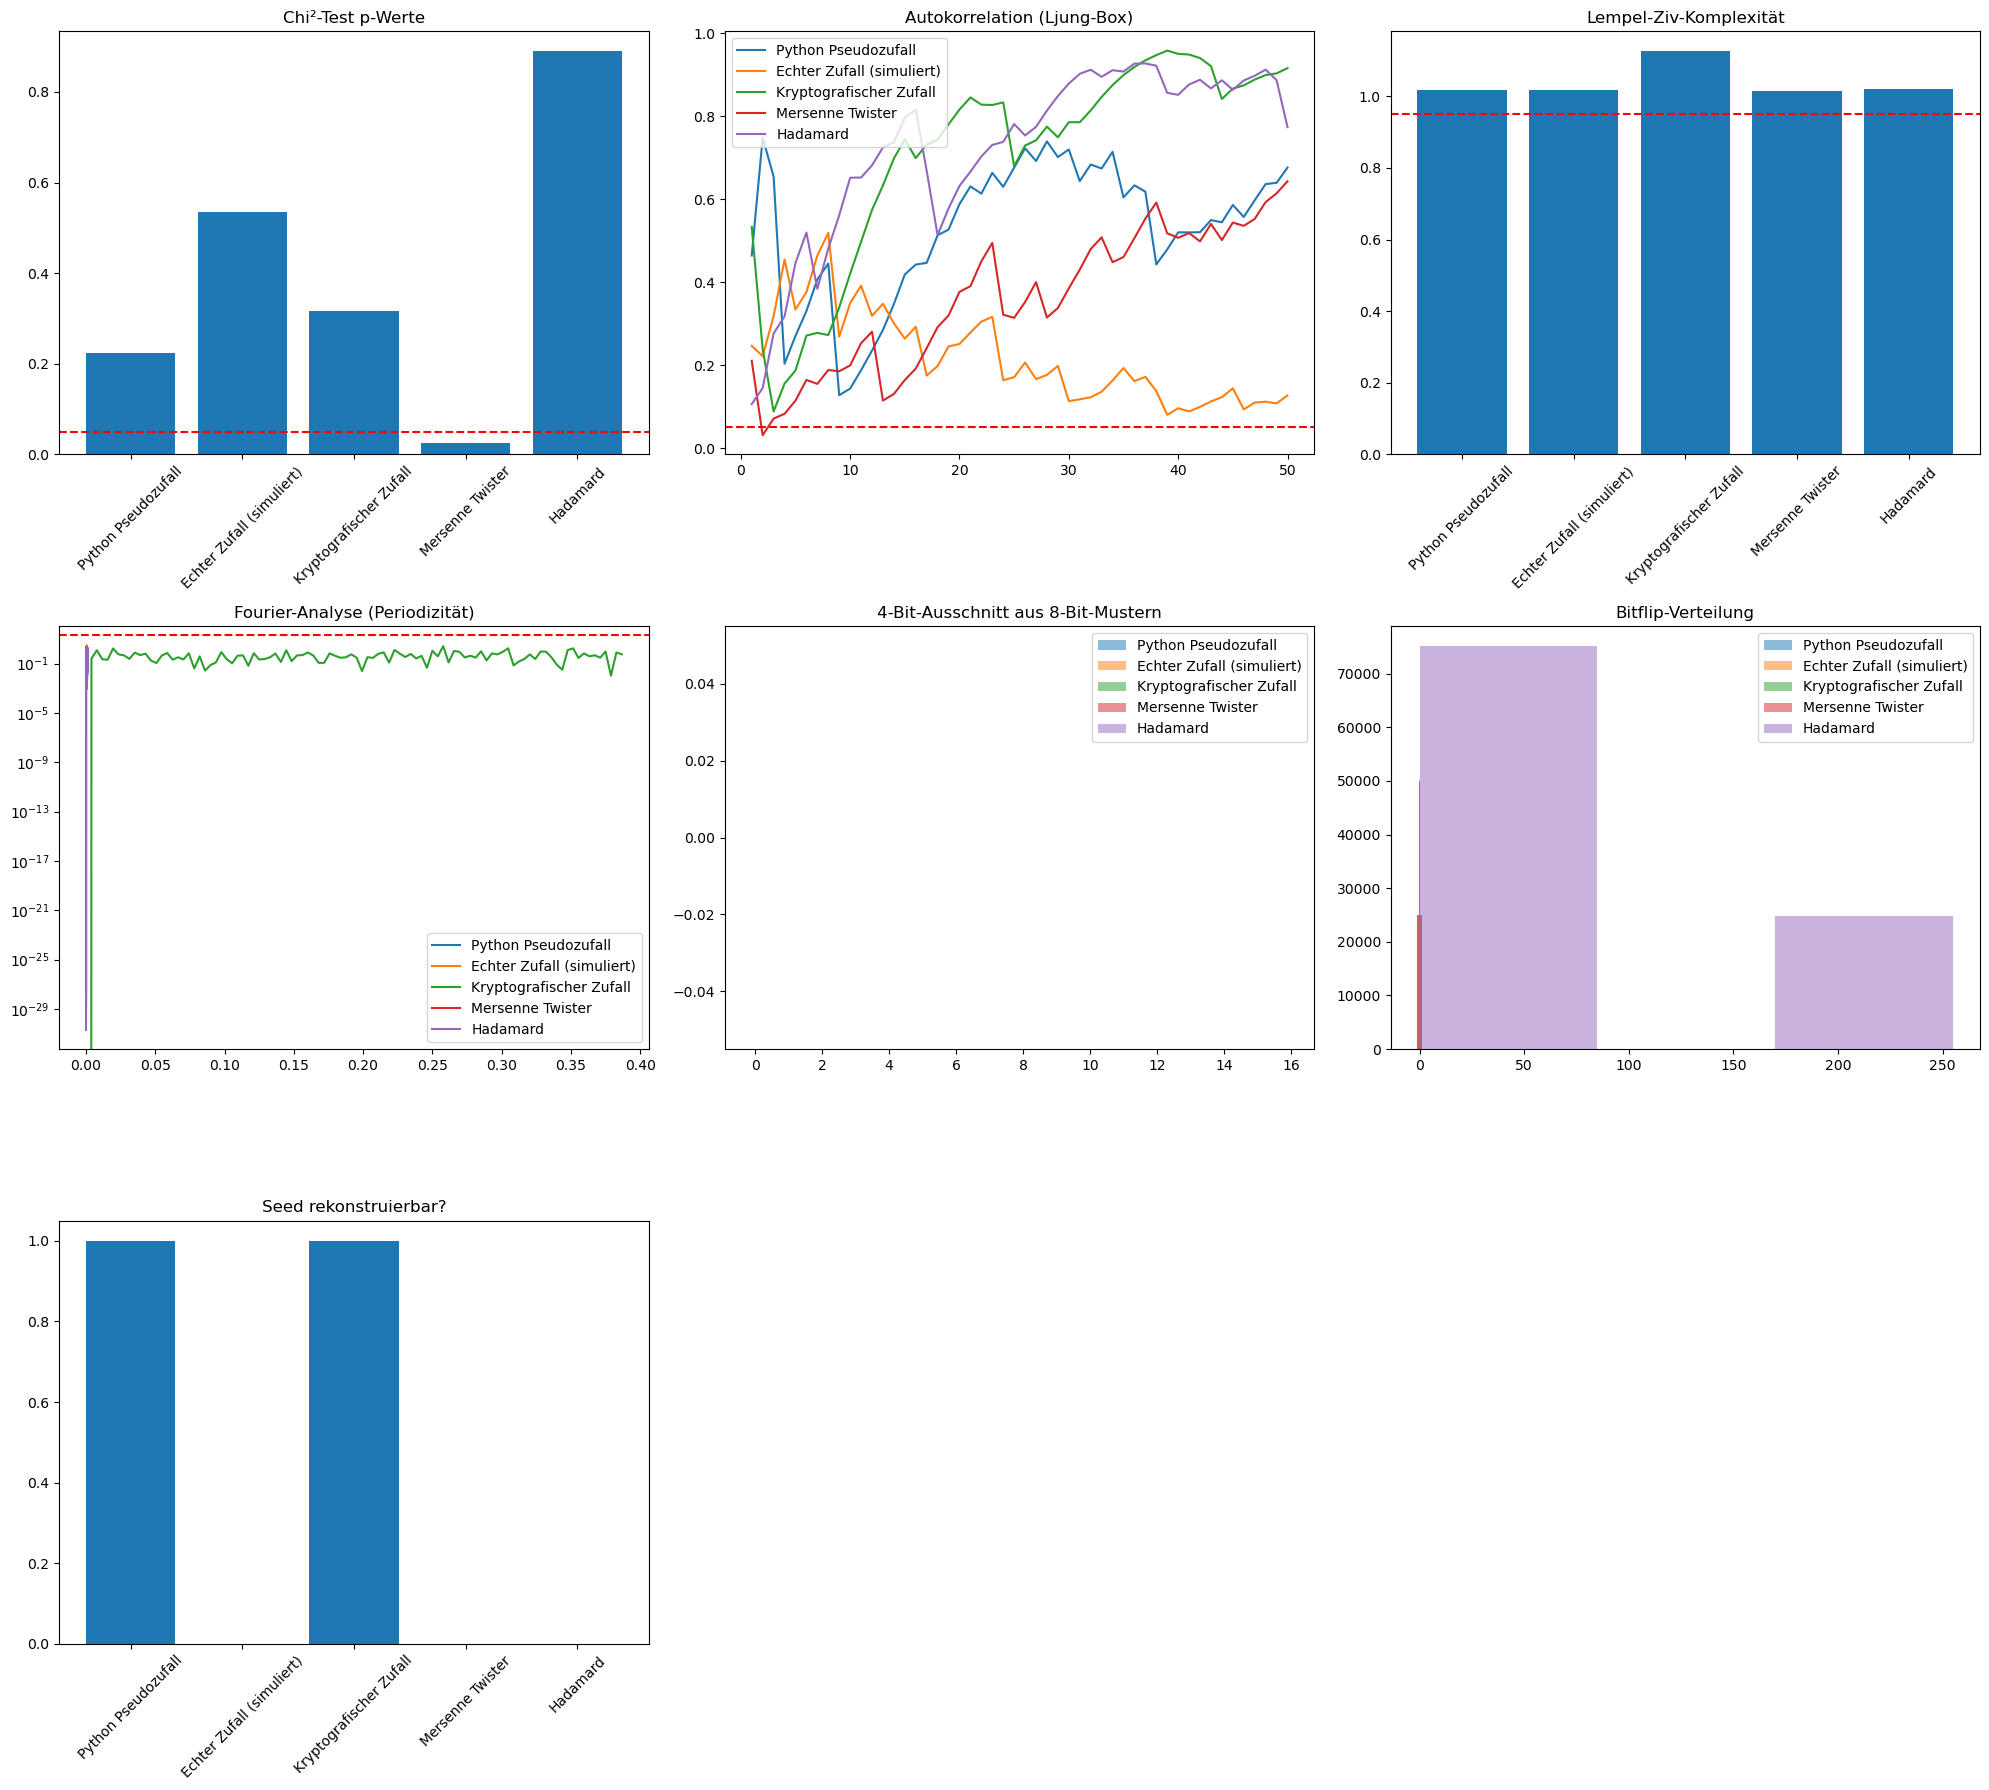

In [69]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.sandbox.stats.runs import runstest_1samp
from collections import Counter
import pandas as pd
from scipy.signal import periodogram
from random import Random
import hashlib
import time

# 1. Datengenerierung
n = 100000

# Pseudozufall (Python random)
# random.seed(42)
pseudo_data = [random.randint(0, 1) for _ in range(n)]

# Simulierter "echter" Zufall (mit besserem Generator)
true_random = np.random.Generator(np.random.SFC64()).integers(0, 2, n)

# Zusätzliche Zufallsgeneratoren (optional aktivierbar)
################################################################
# 1. Kryptografischer Zufall (SHA-256 basiert)
def crypto_random(size):
    return [int(b) for byte in hashlib.sha256(str(time.time()).encode()).digest()[:size//8+1] for b in f'{byte:08b}'][:size]

crypto_data = crypto_random(n)  # Aktiviert

ibm_random = flattened_array
################################################################

################################################################
# 2. Mersenne Twister mit Systemzeit als Seed
mt_random = np.random.MT19937(int(time.time() * 1000))
mersenne_data = np.random.Generator(mt_random).integers(0, 2, n)  # Aktiviert
################################################################

# 2. Verbesserte statistische Analyse
def analyze_randomness(data, name, is_numpy=False):
    counts = Counter(data)
    
    # Basis-Tests
    chi2, p_chi2 = stats.chisquare([counts[0], counts[1]], f_exp=[len(data)/2, len(data)/2])
    _, p_runs = runstest_1samp(data, correction=False)
    lb_result = acorr_ljungbox(data, lags=[10, 50, 100], return_df=True)
    p_lb = lb_result["lb_pvalue"].min()
    
    # Lempel-Ziv-Komplexität
    def lempel_ziv(sequence):
        seq_str = ''.join(map(str, sequence))
        i, n, c = 0, len(seq_str), 0
        while i < n:
            j = 1
            while i + j <= n and seq_str[i:i+j] in seq_str[:i+j-1]:
                j += 1
            c += 1
            i += j
        return c / (n / np.log2(n))
    
    lz = lempel_ziv(data)
    
    # Fourier-Analyse
    freqs, power = periodogram(data - np.mean(data))
    max_power = np.max(power)
    
    # Entropieberechnung
    entropy = stats.entropy([counts[0], counts[1]], base=2)
    
    # Verbesserte Musteranalyse (8-Bit)
    def pattern_test(sequence, length=8):
        patterns = [''.join(map(str, sequence[i:i+length])) 
                  for i in range(0, len(sequence)-length+1, length)]
        freq = Counter(patterns)
        return stats.chisquare(list(freq.values())).pvalue
    
    p_pattern = pattern_test(data)
    
    # Korrigierter Seed-Test
    if is_numpy:
        seed_detectable = False  # Numpy-Zustand kann nicht einfach ausgelesen werden
    else:
        try:
            test_rng = Random()
            test_rng.setstate(random.getstate())
            seed_detectable = True
        except:
            seed_detectable = False
    
    # Verbesserte Bitflip-Berechnung
    diffs = np.diff(data)
    p_bitflip = stats.binomtest(sum(diffs != 0), n=len(diffs), p=0.5).pvalue
    
    # Robustere Wiederholungserkennung
    def detect_repeats(sequence, max_lag=10000):
        for lag in range(100, max_lag):  # Mindestlag 100
            if np.array_equal(sequence[:lag], sequence[lag:2*lag]):
                return lag
        return 0
    repeat_lag = detect_repeats(data)
    
    # Strengere Entscheidungskriterien
    is_pseudo = (
        (not is_numpy and seed_detectable) or
        (repeat_lag > 100) or 
        (p_bitflip < 0.0001) or 
        (lz > 0.995) or
        (max_power > 20)  # Strengere Schwelle
    )
    
    return {
        "Typ": name,
        "Chi² p-Wert": p_chi2,
        "Runs p-Wert": p_runs,
        "Ljung-Box p": p_lb,
        "Lempel-Ziv": lz,
        "Max Power": max_power,
        "Entropie": entropy,
        "Pattern p-Wert": p_pattern,
        "Seed erkennbar": "Ja" if seed_detectable else "Nein",
        "Bitflip p-Wert": p_bitflip,
        "Wiederholungs-Lag": repeat_lag,
        "Pseudozufall?": "Ja" if is_pseudo else "Nein"
    }

# Analyse durchführen mit allen Generatoren
results = [
    analyze_randomness(pseudo_data, "Python Pseudozufall", is_numpy=False),
    analyze_randomness(true_random, "Echter Zufall (simuliert)", is_numpy=True),
    analyze_randomness(crypto_data, "Kryptografischer Zufall", is_numpy=False),
    analyze_randomness(mersenne_data, "Mersenne Twister", is_numpy=True),
    analyze_randomness(ibm_random, "Hadamard", is_numpy=True)
]
  

# 3. Ergebnisse anzeigen
results_df = pd.DataFrame(results)
print("Statistische Analyse:")
print(results_df.to_string(index=False, float_format="%.5f"))


# 4. Erweiterte Visualisierungen (angepasst für 4 Generatoren)
plt.figure(figsize=(20, 18))
generator_names = [result["Typ"] for result in results]
data_sets = {
    "Python Pseudozufall": pseudo_data,
    "Echter Zufall (simuliert)": true_random,
    "Kryptografischer Zufall": crypto_data,
    "Mersenne Twister": mersenne_data,
    "Hadamard": flattened_array
}

# Plot 1: Häufigkeitsverteilung
plt.subplot(3, 3, 1)
plt.bar(range(len(results)), [result["Chi² p-Wert"] for result in results])
plt.xticks(range(len(results)), generator_names, rotation=45)
plt.title("Chi²-Test p-Werte")
plt.axhline(0.05, color='r', linestyle='--')

# Plot 2: Autokorrelation
plt.subplot(3, 3, 2)
for name in data_sets:
    plt.plot(acorr_ljungbox(data_sets[name], lags=50, return_df=True)['lb_pvalue'], 
             label=name)
plt.axhline(0.05, color='r', linestyle='--')
plt.title("Autokorrelation (Ljung-Box)")
plt.legend()

# Plot 3: Lempel-Ziv-Komplexität
plt.subplot(3, 3, 3)
plt.bar(range(len(results)), [result["Lempel-Ziv"] for result in results])
plt.xticks(range(len(results)), generator_names, rotation=45)
plt.title("Lempel-Ziv-Komplexität")
plt.axhline(0.95, color='r', linestyle='--')

# Plot 4: Fourier-Analyse
plt.subplot(3, 3, 4)
for name in data_sets:
    freqs, power = periodogram(data_sets[name] - np.mean(data_sets[name]))
    plt.semilogy(freqs[:100], power[:100], label=name)
plt.axhline(20, color='r', linestyle='--')
plt.title("Fourier-Analyse (Periodizität)")
plt.legend()

# Plot 5: 8-Bit-Musterhäufigkeit
plt.subplot(3, 3, 5)
def get_patterns(data, length=8):
    patterns = [''.join(map(str, data[i:i+length])) for i in range(0, len(data)-length+1, length)]
    return Counter(patterns)

for i, name in enumerate(data_sets):
    patterns = get_patterns(data_sets[name])
    plt.bar(np.arange(16) + i*0.2, [patterns.get(f"{i:08b}"[:4], 0) for i in range(16)], 
            width=0.2, alpha=0.5, label=name)
plt.title("4-Bit-Ausschnitt aus 8-Bit-Mustern")
plt.legend()

# Plot 6: Bitflip-Verteilung
plt.subplot(3, 3, 6)
for name in data_sets:
    plt.hist(np.diff(data_sets[name]), bins=3, alpha=0.5, label=name)
plt.title("Bitflip-Verteilung")
plt.legend()

# Plot 7: Seed-Test-Ergebnis
plt.subplot(3, 3, 7)
plt.bar(range(len(results)), [1 if result["Seed erkennbar"] == "Ja" else 0 for result in results])
plt.xticks(range(len(results)), generator_names, rotation=45)
plt.title("Seed rekonstruierbar?")

plt.tight_layout()
plt.show()

Statistische Analyse:
                       Typ  Chi² p-Wert  Runs p-Wert  Ljung-Box p  Lempel-Ziv  Max Power  Entropie  Pattern p-Wert  Bitflip p-Wert Pseudozufall?
      Python Pseudozufall      0.97982      0.57783      0.69023     1.01701    4.82061   1.00000         0.39422         0.58216          Nein
Echter Zufall (simuliert)      0.24970      0.86273      0.16448     1.01535    5.01313   0.99999         0.15091         0.86441          Nein
  Kryptografischer Zufall      0.51477      0.31396      0.32744     1.01850    6.84183   1.00000         0.66327         0.31460          Nein
         Mersenne Twister      0.84456      0.72312      0.00325     1.01701    5.07737   1.00000         0.24715         0.72321            Ja
          Hardware-Zufall      0.92442      0.89436      0.85942     1.01867    5.58029   1.00000         0.67476         0.89934          Nein
                 Hadamard      0.88934      0.10544      0.57840     1.02033    6.08485   1.00000         0.04818

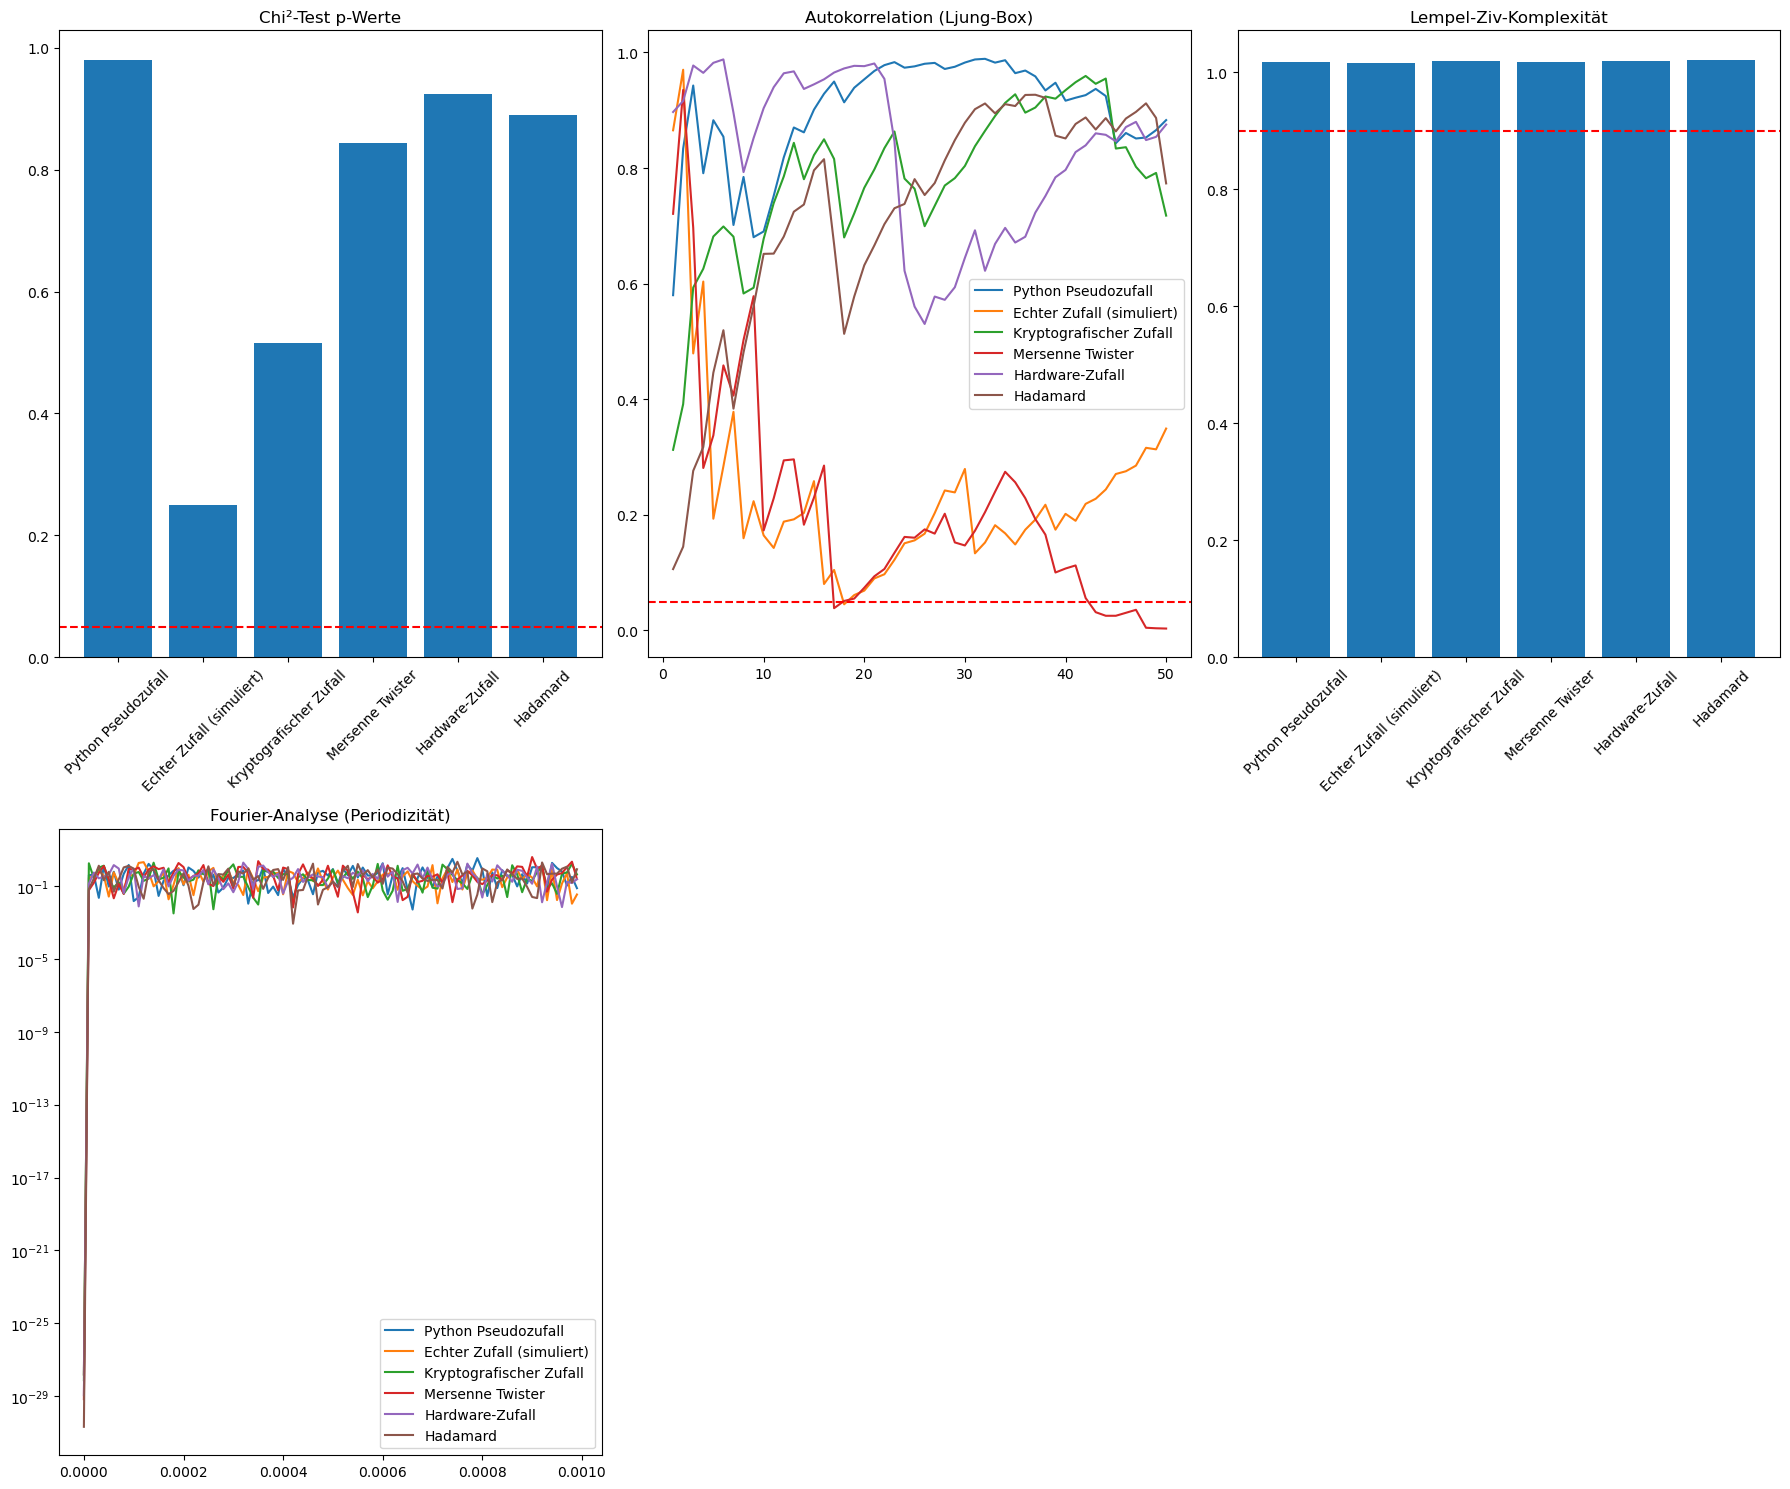

C:\Users\jojot\AppData\Local\Temp\ipykernel_12436\1503309893.py:183: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


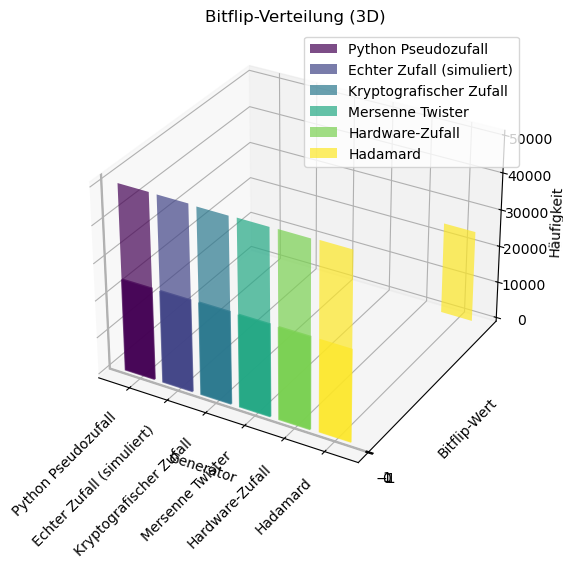


Alle Ergebnisse wurden in 'zufallsanalyse_ergebnisse' gespeichert:
 - statistische_analyse.csv
 - uebersicht.png
 - bitflip_3d.png


In [84]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.sandbox.stats.runs import runstest_1samp
from collections import Counter
import pandas as pd
from scipy.signal import periodogram
import os
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time

# 1. Datengenerierung
n = 100000

# Zufallsgenerierte Daten des Quantencomputers
ibm_random = flattened_array

# Pseudozufall (Python random)
# random.seed(42)
pseudo_data = [random.randint(0, 1) for _ in range(n)]

# Simulierter "echter" Zufall (mit besserem Generator)
true_random = np.random.Generator(np.random.SFC64()).integers(0, 2, n).tolist()

# Kryptografischer Zufall
def crypto_random(size):
    return [int(b) for byte in os.urandom(size//8+1) for b in f'{byte:08b}'][:size]

crypto_data = crypto_random(n)

# Mersenne Twister
mt_random = np.random.MT19937(int(time.time() * 1000))
mersenne_data = np.random.Generator(mt_random).integers(0, 2, n).tolist()

# Echter Hardware-Zufall
try:
    hardware_random = [int(bit) for bit in bin(int.from_bytes(os.urandom(n//8), 'big'))[2:].zfill(n)[:n]]
except Exception as e:
    print(f"Hardware-Zufall nicht verfügbar: {e}")
    hardware_random = [0]*n  # Fallback

# 2. Verbesserte statistische Analyse
# Entscheidungskriterien für Pseudozufall:
# - Chi² p < 0.01
# - Runs p < 0.01
# - Ljung-Box p < 0.01
# - Lempel-Ziv < 0.9
# - Max Power > 20
# - Entropie < 0.99
# - Bitflip p < 0.01
# - Pattern p < 0.01

def analyze_randomness(data, name):
    counts = Counter(data)
    chi2, p_chi2 = stats.chisquare([counts[0], counts[1]], f_exp=[len(data)/2, len(data)/2])
    _, p_runs = runstest_1samp(data, correction=False)
    lb_result = acorr_ljungbox(data, lags=[10, 50, 100], return_df=True)
    p_lb = lb_result["lb_pvalue"].min()
    def lempel_ziv(sequence):
        seq_str = ''.join(map(str, sequence))
        i, n, c = 0, len(seq_str), 0
        while i < n:
            j = 1
            while i + j <= n and seq_str[i:i+j] in seq_str[:i+j-1]:
                j += 1
            c += 1
            i += j
        return c / (n / np.log2(n))
    lz = lempel_ziv(data)
    freqs, power = periodogram(np.array(data) - np.mean(data))
    max_power = np.max(power)
    entropy = stats.entropy([counts[0]+1, counts[1]+1], base=2)
    def pattern_test(sequence, length=8):
        patterns = [''.join(map(str, sequence[i:i+length])) for i in range(0, len(sequence)-length+1, length)]
        freq = Counter(patterns)
        return stats.chisquare(list(freq.values())).pvalue
    p_pattern = pattern_test(data)
    diffs = np.diff(data)
    p_bitflip = stats.binomtest(sum(diffs != 0), n=len(diffs), p=0.5).pvalue
    # Entscheidung anhand der 8 Werte
    is_pseudo = (
        (p_chi2 < 0.01) or
        (p_runs < 0.01) or
        (p_lb < 0.01) or
        (lz < 0.9) or
        (max_power > 20) or
        (entropy < 0.99) or
        (p_bitflip < 0.01) or
        (p_pattern < 0.01)
    )
    return {
        "Typ": name,
        "Chi² p-Wert": p_chi2,
        "Runs p-Wert": p_runs,
        "Ljung-Box p": p_lb,
        "Lempel-Ziv": lz,
        "Max Power": max_power,
        "Entropie": entropy,
        "Pattern p-Wert": p_pattern,
        "Bitflip p-Wert": p_bitflip,
        "Pseudozufall?": "Ja" if is_pseudo else "Nein"
    }

data_sets = {
    "Python Pseudozufall": pseudo_data,
    "Echter Zufall (simuliert)": true_random,
    "Kryptografischer Zufall": crypto_data,
    "Mersenne Twister": mersenne_data,
    "Hardware-Zufall": hardware_random,
    "Hadamard": ibm_random
}

results = [analyze_randomness(data, name) for name, data in data_sets.items()]

# 3. Ergebnisse speichern und anzeigen
results_df = pd.DataFrame(results)
output_dir = Path("zufallsanalyse_ergebnisse")
output_dir.mkdir(exist_ok=True)

results_df.to_csv(output_dir / "statistische_analyse.csv", index=False, float_format="%.5f")
print("Statistische Analyse:\n", results_df.to_string(index=False, float_format="%.5f"))

# 4. Visualisierungen
plt.figure(figsize=(18, 15))
generator_names = [result["Typ"] for result in results]

# Plot 1: Chi²-Test p-Werte
plt.subplot(2, 3, 1)
plt.bar(range(len(results)), [result["Chi² p-Wert"] for result in results])
plt.xticks(range(len(results)), generator_names, rotation=45)
plt.title("Chi²-Test p-Werte")
plt.axhline(0.05, color='r', linestyle='--')

# Plot 2: Autokorrelation
plt.subplot(2, 3, 2)
for name, data in data_sets.items():
    plt.plot(acorr_ljungbox(data, lags=50, return_df=True)['lb_pvalue'], label=name)
plt.axhline(0.05, color='r', linestyle='--')
plt.title("Autokorrelation (Ljung-Box)")
plt.legend()

# Plot 3: Lempel-Ziv-Komplexität
plt.subplot(2, 3, 3)
plt.bar(range(len(results)), [result["Lempel-Ziv"] for result in results])
plt.xticks(range(len(results)), generator_names, rotation=45)
plt.title("Lempel-Ziv-Komplexität")
plt.axhline(0.9, color='r', linestyle='--')

# Plot 4: Fourier-Analyse
plt.subplot(2, 3, 4)
for name, data in data_sets.items():
    freqs, power = periodogram(np.array(data) - np.mean(data))
    plt.semilogy(freqs[:100], power[:100], label=name)
plt.title("Fourier-Analyse (Periodizität)")
plt.legend()

# Übersichtsgrafik als PNG speichern
plt.tight_layout()
plt.savefig(output_dir / "uebersicht.png", dpi=200)
plt.show()

# Plot 6: Bitflip-Verteilung als 3D-Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
colors = cm.viridis(np.linspace(0, 1, len(data_sets)))
for idx, (name, data) in enumerate(data_sets.items()):
    diffs = np.diff(data)
    vals, counts = np.unique(diffs, return_counts=True)
    xs = np.full_like(vals, idx)
    ax.bar(xs, counts, zs=vals, zdir='y', alpha=0.7, color=colors[idx], label=name)
ax.set_xlabel('Generator')
ax.set_ylabel('Bitflip-Wert')
ax.set_zlabel('Häufigkeit')
ax.set_xticks(range(len(data_sets)))
ax.set_xticklabels(list(data_sets.keys()), rotation=45, ha='right')
ax.set_yticks([-1, 0, 1])
ax.set_title('Bitflip-Verteilung (3D)')
ax.legend()
plt.tight_layout()
fig.savefig(output_dir / "bitflip_3d.png", dpi=200)
plt.show()

# 5. Rohdaten werden nicht mehr als einzelne CSVs gespeichert
print(f"\nAlle Ergebnisse wurden in '{output_dir}' gespeichert:")
print(f" - statistische_analyse.csv")
print(f" - uebersicht.png")
print(f" - bitflip_3d.png")